# Time series analysis of geospatial data

In [1]:
import rasterio 
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd

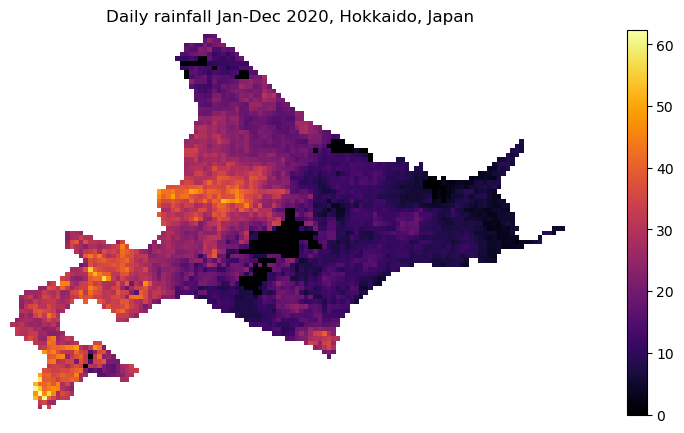

In [2]:
# visualize one raster layer

rf = rasterio.open('./data/hokkaido/20201101.tif')

fig, ax = plt.subplots(figsize=(15,5))

_ = ax.imshow(rf.read()[0], cmap = 'inferno')
fig.colorbar(_, ax=ax)
plt.axis('off')
plt.title('Daily rainfall Jan-Dec 2020, Hokkaido, Japan');

In [3]:
# specify folder path
tsFolderPath = './data/hokkaido/'

In [4]:
# create empty lists to store data
date = []
rainfall_mm = []

# loop through each raster
for file in os.listdir(tsFolderPath):
    
    # read the files
    rf = rasterio.open(tsFolderPath + file)
    
    # convert raster data to array
    array = rf.read(1)
    
    # store data in the list
    date.append(file[:-4])
    rainfall_mm.append(array[array>=0].mean())

In [5]:
print(date[:5])
print(rainfall_mm[:5])

['20200904', '20200910', '20200723', '20200509', '20200521']
[4.4631577, 6.95278, 3.4205956, 1.7203209, 0.45923564]


In [6]:
# convert lists to a dataframe
df = pd.DataFrame(zip(date, rainfall_mm), columns = ['date', 'rainfall_mm']) 

In [7]:
df.head()

,date,rainfall_mm
0,20200904,4.463158
1,20200910,6.952780
2,20200723,3.420596
3,20200509,1.720321
4,20200521,0.459236


In [8]:
df['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 366 entries, 0 to 365
Series name: date
Non-Null Count  Dtype 
--------------  ----- 
366 non-null    object
dtypes: object(1)
memory usage: 3.0+ KB


In [9]:
# Convert dataframe to datetime object
df['date'] = pd.to_datetime(df['date'])

In [10]:
df.head()

,date,rainfall_mm
0,2020-09-04,4.463158
1,2020-09-10,6.952780
2,2020-07-23,3.420596
3,2020-05-09,1.720321
4,2020-05-21,0.459236


In [11]:
# Let's confirm that the dataframe is now a datetime object

In [12]:
df['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 366 entries, 0 to 365
Series name: date
Non-Null Count  Dtype         
--------------  -----         
366 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 3.0 KB


In [13]:
df = df.sort_values('date')
df.set_index('date', inplace=True)

In [14]:
df.head()

,rainfall_mm
date,
2020-01-01,0.0
2020-01-02,0.0
2020-01-03,0.0
2020-01-04,0.0
2020-01-05,0.0


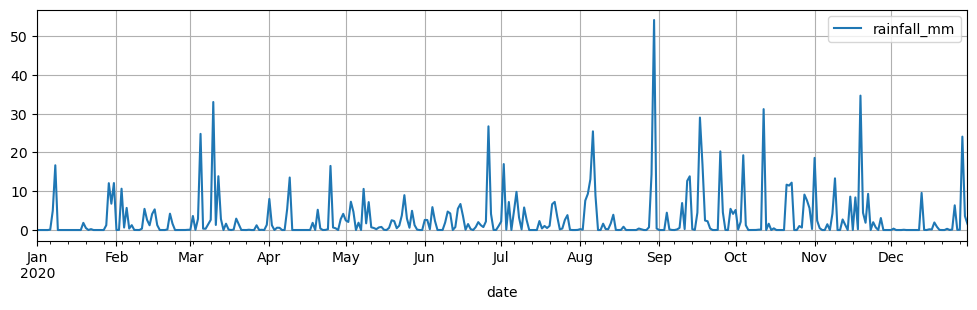

In [15]:
# plot
df.plot(figsize=(12,3), grid =True);